<a href="https://colab.research.google.com/github/Haider-q/Deep-Learning-Assignments/blob/main/Credit_Card_Fraud_Detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Identify fraudulent credit card transactions.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# Load Data

In [6]:
data = pd.read_csv('/content/creditcard.csv')

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,-0.333609,0.865847,-1.560515,1.008561,0.843260,-0.190991,-0.040584,0.420274,0.001080,-0.086197,0.022740,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,1.233066,1.193020,1.538233,1.159372,1.339198,0.979098,0.970020,1.226870,0.846063,0.826925,0.584038,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,-0.786564,0.069939,-2.474334,0.202567,0.266895,-0.773039,-0.529582,-0.054278,-0.436966,-0.574853,-0.162353,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,-0.382171,0.799094,-1.866619,1.107065,1.123058,-0.050635,0.029426,0.415021,0.053610,-0.087252,-0.038037,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,0.124503,1.664089,-0.425290,1.862585,1.562890,0.485050,0.532973,0.895445,0.496725,0.435214,0.138816,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,12.259949,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [34]:
%time data.isnull().any()

CPU times: user 3.23 ms, sys: 19 µs, total: 3.25 ms
Wall time: 3.16 ms


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [32]:
print(data['Amount'])
print("")
print(data['Class'])

0        149.62
1          2.69
2        378.66
3        123.50
4         69.99
          ...  
13949     23.74
13950    794.20
13951     60.00
13952     90.00
13953      0.00
Name: Amount, Length: 13954, dtype: float64

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13949    0.0
13950    0.0
13951    0.0
13952    0.0
13953    0.0
Name: Class, Length: 13954, dtype: float64


In [35]:
data['Amount'].fillna(0 ,inplace=True)
data['Class'].fillna(0 ,inplace=True)


# Standardized the Input Variables

In [36]:
data.reset_index(drop=True, inplace=True)
labels = data.pop('Class')

In [37]:
data -= data.mean()
data /= data.std()

In [38]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04,1.395400e+04
mean,-1.984016e-15,4.359101e-16,-2.072140e-16,-1.819607e-16,-3.998521e-16,1.874267e-16,7.363045e-16,-5.620335e-17,-1.714584e-17,1.805636e-15,-2.203579e-16,-1.815629e-16,1.233548e-15,-5.520245e-16,-1.930566e-15,2.314410e-16,8.449995e-17,-1.053477e-15,-2.130520e-16,8.291585e-16,5.123861e-16,-5.485396e-16,4.000431e-16,-2.604139e-16,1.640750e-16,-1.098925e-16,9.005564e-16,9.697146e-17,8.004044e-18,1.492622e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.307707e+00,-1.594760e+01,-2.501565e+01,-1.634058e+01,-3.305569e+00,-2.479531e+01,-1.789216e+01,-2.130730e+01,-1.871307e+01,-6.725394e+00,-1.121853e+01,-2.901184e+00,-1.053718e+01,-3.793493e+00,-1.497731e+01,-4.046114e+00,-1.256325e+01,-1.549279e+01,-9.529183e+00,-5.860915e+00,-2.277039e+01,-1.304479e+01,-1.356636e+01,-3.845233e+01,-4.297387e+00,-1.144664e+01,-2.461268e+00,-1.999474e+01,-1.399021e+01,-3.591035e-01
25%,-9.221262e-01,-4.267301e-01,-4.065197e-01,-2.810021e-01,-6.170324e-01,-4.640773e-01,-5.695551e-01,-3.705932e-01,-1.316317e-01,-5.780078e-01,-3.673405e-01,-6.671370e-01,-5.940707e-01,-6.951982e-01,-4.303806e-01,-5.944733e-01,-5.041107e-01,-3.867986e-01,-5.177462e-01,-5.909320e-01,-3.169207e-01,-2.331291e-01,-6.307872e-01,-2.765506e-01,-5.974098e-01,-5.909661e-01,-7.346359e-01,-2.243761e-01,-6.644517e-02,-3.282403e-01
50%,-1.336837e-01,-4.869059e-02,-2.249984e-02,7.360839e-02,-5.509155e-02,-5.653119e-02,-2.061588e-01,3.660361e-02,2.622158e-02,-1.516708e-02,-3.938305e-02,-5.595245e-02,-1.989969e-01,8.496372e-02,2.089296e-01,1.433526e-01,7.217442e-02,-4.281761e-03,6.208698e-02,-1.276585e-03,-1.040641e-01,-7.353747e-02,5.579256e-02,-1.891889e-02,8.352807e-02,8.912826e-02,-1.278348e-01,-3.438180e-02,5.520255e-02,-2.709268e-01
75%,9.021545e-01,8.128380e-01,4.304935e-01,4.873802e-01,5.972080e-01,3.644722e-01,2.881566e-01,4.675719e-01,2.233586e-01,5.472263e-01,3.715232e-01,6.690939e-01,7.380062e-01,7.366267e-01,5.373586e-01,6.904739e-01,5.912840e-01,3.873030e-01,5.858248e-01,6.305414e-01,1.987467e-01,9.922120e-02,6.214872e-01,2.107517e-01,6.497956e-01,6.449596e-01,6.085133e-01,2.145638e-01,2.752138e-01,-6.605727e-02
max,1.891285e+00,1.276610e+00,7.366132e+00,2.085128e+00,7.746753e+00,2.653603e+01,1.610507e+01,2.782251e+01,8.360936e+00,7.745240e+00,1.021321e+01,9.348597e+00,3.468495e+00,2.981658e+00,5.114217e+00,3.907713e+00,5.006943e+00,7.199825e+00,5.075944e+00,5.613032e+00,1.368033e+01,2.595471e+01,7.545173e+00,2.783435e+01,5.430698e+00,1.263707e+01,6.236551e+00,2.062720e+01,1.900062e+01,4.299803e+01



# Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels)

In [39]:
data_len = len(data)
train_data = data.iloc[:data_len*50//100]
val_data = data.iloc[data_len*50//100:data_len*70//100]
test_data = data.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

# Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment)

In [51]:
network = models.Sequential()
network.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
network.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [52]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [53]:
with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/10
28/28 [==============================] - 1s 12ms/step - loss: 0.6215 - acc: 0.6481 - val_loss: 0.8034 - val_acc: 0.3652
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 0.4553 - acc: 0.8360 - val_loss: 0.7968 - val_acc: 0.4208
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: 0.3327 - acc: 0.9224 - val_loss: 0.7302 - val_acc: 0.5029
Epoch 4/10
28/28 [==============================] - 0s 5ms/step - loss: 0.2334 - acc: 0.9686 - val_loss: 0.5888 - val_acc: 0.6534
Epoch 5/10
28/28 [==============================] - 0s 4ms/step - loss: 0.1548 - acc: 0.9919 - val_loss: 0.4118 - val_acc: 0.8294
Epoch 6/10
28/28 [==============================] - 0s 4ms/step - loss: 0.1003 - acc: 0.9987 - val_loss: 0.2684 - val_acc: 0.9573
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: 0.0673 - acc: 0.9993 - val_loss: 0.1679 - val_acc: 0.9900
Epoch 8/10
28/28 [==============================] - 0s 4ms/step - loss: 0.0464 - acc: 0.9

In [54]:
test_loss , test_acc = network.evaluate(test_data,test_labels)

131/131 [==============================] - 0s 968us/step - loss: 1.0164 - acc: 0.4848


In [55]:
test_labels[test_labels == 1]

10204    1.0
10484    1.0
10497    1.0
10498    1.0
10568    1.0
10630    1.0
10690    1.0
10801    1.0
10891    1.0
10897    1.0
11343    1.0
11710    1.0
11841    1.0
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, dtype: float64

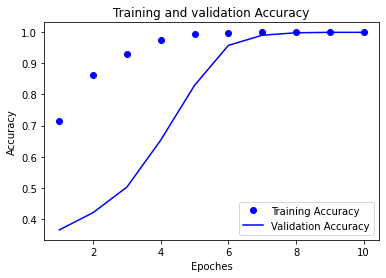

In [56]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Relu

In [57]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
network1.add(layers.Dense(20,activation="relu" ))
network1.add(layers.Dense(10,activation="relu"))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL1 = network1.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
14/14 [==============================] - 1s 22ms/step - loss: 0.5633 - acc: 0.9105 - val_loss: 0.4832 - val_acc: 0.9950
Epoch 2/10
14/14 [==============================] - 0s 9ms/step - loss: 0.3686 - acc: 0.9961 - val_loss: 0.3558 - val_acc: 0.9953
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.2245 - acc: 0.9961 - val_loss: 0.2343 - val_acc: 0.9953
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.1186 - acc: 0.9972 - val_loss: 0.1520 - val_acc: 0.9953
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0637 - acc: 0.9968 - val_loss: 0.0981 - val_acc: 0.9953
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0370 - acc: 0.9962 - val_loss: 0.0624 - val_acc: 0.9953
Epoch 7/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0227 - acc: 0.9966 - val_loss: 0.0392 - val_acc: 0.9953
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0140 - acc: 0.9

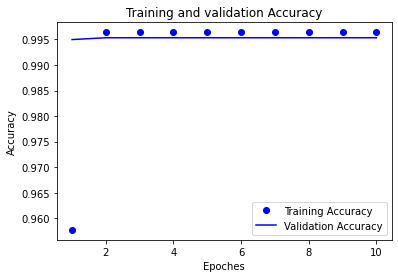

In [58]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluation Step

In [60]:
test_loss , test_acc = network1.evaluate(test_data,test_labels)

131/131 [==============================] - 0s 1ms/step - loss: 0.0234 - acc: 0.9957


# Predict

In [61]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(test_labels)
print(f"{len(hit)} out of {len(predictions)} ")

4187 out of 4187 


In [63]:
y_pred = (predictions > 0.5).astype('u8')
print(test_acc*100)

99.57009553909302
